## Navigating the .h5 file

In [1]:
import os
import sys
import h5py
import numpy as np
import matplotlib.pyplot as plt

Let's view the available .h5 files in the *targets* directory and load the ICSD structure with CollCode = 20790, viewed along the \[0,2,1\] direction (remember, the even positions of the second sequence of six numbers give the \[u,v,w\] indices, and the preceding odd position indicates sign, 0 for + and 1 for -)

In [2]:
os.listdir('../retrieval/targets/h5/')

['411361.010100.h5',
 '020790.010102.h5',
 '010438.010202.h5',
 '411361.010000.h5',
 '010438.010101.h5',
 '010438.000102.h5',
 '020790.000001.h5',
 '411361.020102.h5',
 '020790.020100.h5',
 '020790.000201.h5',
 '411361.010102.h5',
 '010438.010102.h5']

In [3]:
h5file = h5py.File("../retrieval/targets/h5/020790.000201.h5", 'r')

Each .h5 file is organized into groups (collections of data describing or representing the underlying structure and/or image). 

Located in the root group, is a set of attribute headers that provide further context for the data (chemical structure, ICSD CollCode, *etc.*). To open the .h5 file in python and read the attribute headers, use the following commands:

In [4]:
print("Attributes: ",list(h5file.attrs.keys()))

Attributes:  ['angstrom_xy', 'chemical_formula', 'hkl_plane', 'icsd_collcode', 'uvw_direction']


To view the values of specific attributes:

In [5]:
print("Chemical Formula  :", h5file.attrs['chemical_formula'].decode("utf-8") )
print("ICSD CollCode     :", h5file.attrs['icsd_collcode'].decode("utf-8") )
print("Zone Axis [uvw]   :", h5file.attrs['uvw_direction'].decode("utf-8") )

Chemical Formula  : 'Lu Ni Sn2'
ICSD CollCode     : 20790
Zone Axis [uvw]   : (0.0, 2.0, 1.0)


There are is a ***haadf*** group in the .h5 file which contains a collection of simulated haadf images which have been post-processed according to parameters associated with the respective *query* or *pool* type image distortion at a given level. First, to view the available distortion types


In [6]:
print("Distortion types: ",list(h5file['haadf'].keys()))


Distortion types:  ['peak_map_clean', 'peak_map_dfct1', 'peak_map_dfct2', 'raw', 'stem00-bkgd1', 'stem00-bkgd2', 'stem00-blbk1', 'stem00-blbk2', 'stem00-blur1', 'stem00-blur2', 'stem00-clean', 'stem00-cnts1', 'stem00-cnts2', 'stem00-dfct1', 'stem00-dfct2', 'stem00-scan1', 'stem00-scan2', 'stem01-comb1', 'stem02-comb2']


To access (and view) an image of a specific distortion type, first convert to a numpy array and then use matplolib plotting tools to display.


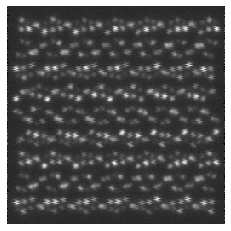

In [7]:
clean_img = np.array(h5file['haadf']['stem00-clean'])

plt.imshow(clean_img,cmap='gray'); plt.axis('off'); plt.show()

Notice that the ***haadf*** group also contains peak maps associated with the different strutures imaged. The only distortion altering the underlying structure is the 'dfct' type. Unless otherwise specified, a 'clean' peak map represents the locations of the atomic column peaks in the image (computed from knowledge of atom positions used to simulate the images). To view a peak map, overlayed on one of the distorition images:

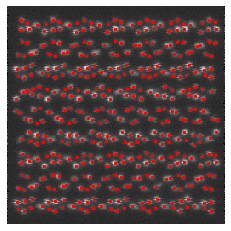

In [8]:
plt.imshow(clean_img,cmap='gray')

for c in zip(*np.nonzero(np.array(h5file['haadf']['peak_map_clean']))):
    plt.scatter(c[1], c[0],marker='x',c='r', s=6)

plt.axis('off');plt.show()

The final ***projection*** group contains of the coordinate values for the atomic columns, projected in the x,y plane. Depending on the parameters of the simulation and the nature of the distortion, not all of these columns will be distinct and visible in the image. Effort was made in the creation of the peak maps to only include peak positions that are both well resolved and clearly visible when the image is displayed.

In [9]:
print("Groups: ",list(h5file.keys()))
print("Groups: ",list(h5file['projection'].keys()))
print("Coordinates of projected atoms (abv...)\n", np.array(h5file['projection']['full_coords'])[0::100])

Groups:  ['haadf', 'projection']
Groups:  ['dlo_coords', 'dmd_coords', 'full_coords']
Coordinates of projected atoms (abv...)
 [[153.55794  151.81494 ]
 [ 43.709415  29.773186]
 [239.31612  214.97084 ]
 [ 11.987623  80.74689 ]
 [ 86.005135 213.24399 ]
 [236.74051  172.63142 ]
 [117.65354  201.67404 ]]
